# **Regression**

In [ ]:
#Ruchi Bhavsar

In [ ]:
from sklearn.datasets import load_boston
house = load_boston()
X = house.data
y = house.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#STEP 1 - Split the dataset in 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#STEP 2(A) - Fit all features
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
#STEP 2(B) - Coefficiients, MSE and Var
import numpy as np

print("The coefficients are : \n", lr.coef_)

mse = np.sum((y_pred - y_test)**2)/len(y_test)
print('\nMean Squared Error(MSE) : %.2f' % mse)

print("\nVariance Score : %.2f" % lr.score(X_test, y_test))

The coefficients are : 
 [-1.30311896e-01  4.75855275e-02  2.51702596e-02  2.86922447e+00
 -1.92031822e+01  3.43185400e+00 -2.36716656e-03 -1.42503090e+00
  3.22923793e-01 -1.31884333e-02 -9.22576923e-01  8.91115391e-03
 -5.17128270e-01]

Mean Squared Error(MSE) : 23.50

Variance Score : 0.76


Feature : 0
Coefficients :  [-0.37807493]
Mean Squared Error : 75.50
Variance Score : 0.18



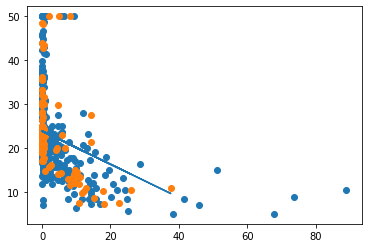

Feature : 1
Coefficients :  [0.13329544]
Mean Squared Error : 64.52
Variance Score : 0.13



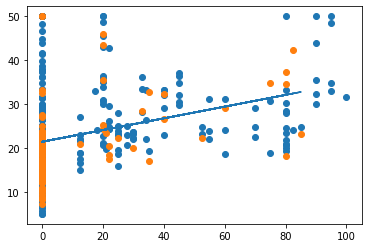

Feature : 2
Coefficients :  [-0.6904278]
Mean Squared Error : 67.31
Variance Score : 0.09



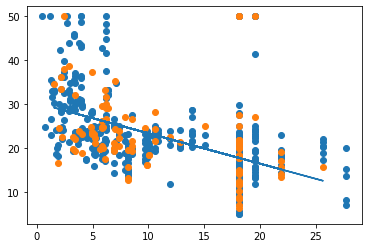

Feature : 3
Coefficients :  [6.62258391]
Mean Squared Error : 72.92
Variance Score : 0.01



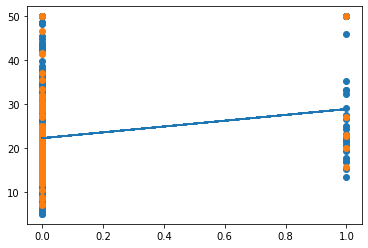

Feature : 4
Coefficients :  [-34.64844597]
Mean Squared Error : 59.56
Variance Score : 0.15



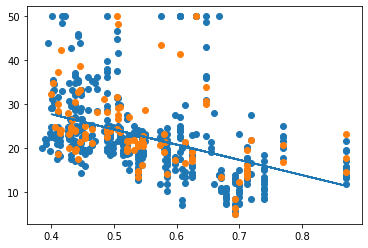

Feature : 5
Coefficients :  [9.48633755]
Mean Squared Error : 56.13
Variance Score : 0.30



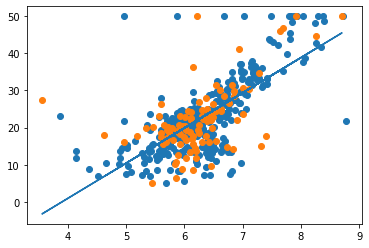

Feature : 6
Coefficients :  [-0.12362934]
Mean Squared Error : 75.61
Variance Score : 0.12



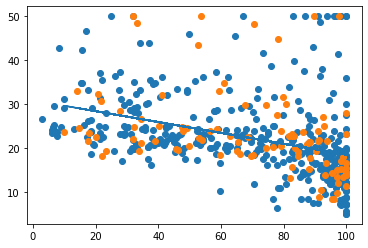

Feature : 7
Coefficients :  [1.16401035]
Mean Squared Error : 85.70
Variance Score : 0.02



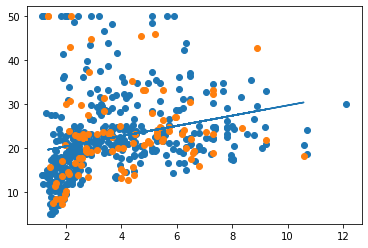

Feature : 8
Coefficients :  [-0.42361571]
Mean Squared Error : 77.20
Variance Score : 0.06



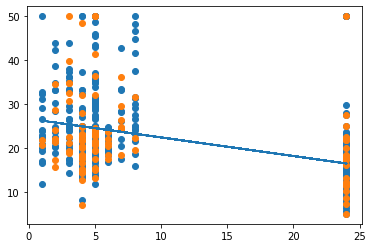

Feature : 9
Coefficients :  [-0.02604364]
Mean Squared Error : 48.54
Variance Score : 0.23



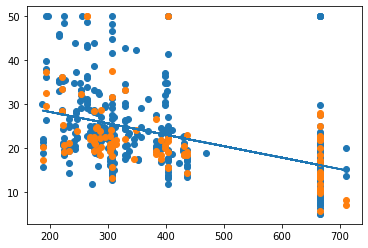

Feature : 10
Coefficients :  [-2.24805535]
Mean Squared Error : 70.24
Variance Score : 0.18



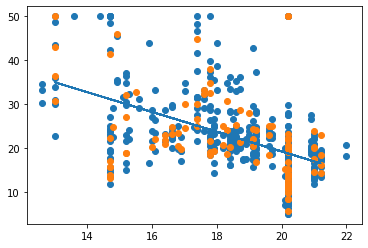

Feature : 11
Coefficients :  [0.03242041]
Mean Squared Error : 62.06
Variance Score : 0.12



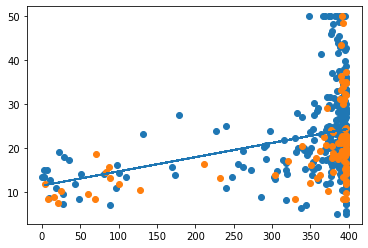

Feature : 12
Coefficients :  [-0.98535887]
Mean Squared Error : 34.23
Variance Score : 0.57



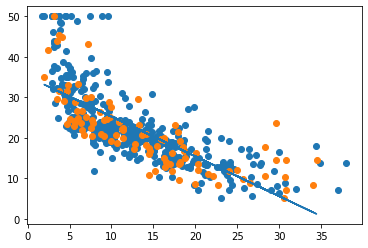

In [ ]:
#STEP 3(A) - Fit each feature
#STEP 3(B) - Coefficients, Variance Score, MSE and plot

import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
for i in range(13):
    X_new = pd.DataFrame(house.data[:,i])
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    lr1 = LinearRegression()
    lr1.fit(X_train, y_train)
    y_p =lr1.predict(X_test)

    plt.scatter(X_train, y_train, label = 'Train')
    plt.scatter(X_test, y_test, label = 'Test')
    plt.plot(X_test.values.reshape(-1, 1), y_p, label='line')

    print('Feature : ' + str(i))
    print('Coefficients : ', lr1.coef_)
    print('Mean Squared Error : %.2f' % (np.sum((y_p - y_test)**2)/len(y_test)))
    print('Variance Score : %.2f\n' % lr1.score(X_test, y_test))
    plt.show()

In [ ]:
#STEP 4(A) and 4(B) - Perform 10 iterations

coef = []
mse = []
var = []
coef_f = []
mse_f = []
var_f = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  reg = LinearRegression()
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  
  coef.append(reg.coef_)
  val = np.sum((y_pred - y_test)**2)/len(y_test)
  mse.append(val)
  var.append(reg.score(X_test, y_test))

for j in range(10):
  t1 = []
  t2 = []
  t3 = []

  for k in range(13):
    X_new = pd.DataFrame(house.data[:,i])
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
    l = LinearRegression()
    l.fit(X_train, y_train)
    y_p = l.predict(X_test)
  
    t1.append(l.coef_)
    val = np.sum((y_p - y_test)**2)/len(y_test)
    t2.append(val)
    t3.append(l.score(X_test, y_test))

  coef_f.append(t1)
  mse_f.append(t2)
  var_f.append(t3)

c_all = []
c = []
m = []
v =[]

for i in range(13):
  t = 0
  t1 = 0
  m_t = 0
  v_t = 0

  for j in range(10):
    t += coef[j][i]
    t1 += coef_f[j][i]
    m_t += mse_f[j][i]
    v_t += var_f[j][i]

  t = t/10
  t1 = t1/10
  m_t = m_t/10
  v_t = v_t/10

  c_all.append(t)
  c.append(t1)
  m.append(m_t)
  v.append(v_t)
  print('Feature : ' + str(i))
  print("Avg Coefficients : %.2f" % t1[0])
  print("Avg Mean Squared Error : %.2f" % m[i])
  print("Avg Variance Score : %.2f\n" % v[i])

print('All Features')
print("Avg Coefficients : ", c_all)
print("Avg Mean Squared Error : %.2f" % (sum(mse) / len(mse)))
print("Avg  Variance Score : %.2f" % (sum(var) / len(var)))


  

Feature : 0
Avg Coefficients : -0.03
Avg Mean Squared Error : 65.09
Avg Variance Score : 0.25

Feature : 1
Avg Coefficients : -0.03
Avg Mean Squared Error : 70.45
Avg Variance Score : 0.16

Feature : 2
Avg Coefficients : -0.03
Avg Mean Squared Error : 68.49
Avg Variance Score : 0.20

Feature : 3
Avg Coefficients : -0.02
Avg Mean Squared Error : 70.87
Avg Variance Score : 0.23

Feature : 4
Avg Coefficients : -0.03
Avg Mean Squared Error : 69.32
Avg Variance Score : 0.18

Feature : 5
Avg Coefficients : -0.03
Avg Mean Squared Error : 70.86
Avg Variance Score : 0.17

Feature : 6
Avg Coefficients : -0.03
Avg Mean Squared Error : 68.85
Avg Variance Score : 0.18

Feature : 7
Avg Coefficients : -0.03
Avg Mean Squared Error : 62.65
Avg Variance Score : 0.24

Feature : 8
Avg Coefficients : -0.03
Avg Mean Squared Error : 66.41
Avg Variance Score : 0.20

Feature : 9
Avg Coefficients : -0.03
Avg Mean Squared Error : 65.68
Avg Variance Score : 0.21

Feature : 10
Avg Coefficients : -0.03
Avg Mean Squ

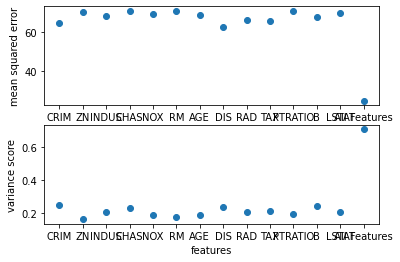

In [ ]:
plt.figure()
features = house.feature_names
name = features.tolist()
name.append("All Features")

m.append((sum(mse) / len(mse)))
v.append((sum(var) / len(var)))
plt.subplot(2,1,1)
s1=plt.scatter(name, m)
plt.ylabel('mean squared error')
plt.subplot(2,1,2)
s2=plt.scatter(name, v)
plt.ylabel('variance score')
plt.xlabel('features')
plt.show()

### Questions

## 1. Based upon the linear models you generated, which feature appears to be most predictive for the target feature? Note that you can answer this question based upon the output provided for the linear models.

##### *Based on the linear model generated, the feature 9 and feature 12 appear to be the most predictive of the target variable due to it's high variance score and low MSE.*

## 2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

##### *Feature 9 and feature 12 would be my obvious choices since the two features have a relatively linear relationship with the target varaiable.*

## 3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

##### *It can be noticed that the model performs better when it is trained with all the features than any individual feature. We can also see that the feature 3 has extremely low variance and and it shows that it is not a good fit for the model.*


References-

1. https://www.analyticsvidhya.com/blog/2022/02/linear-regression-with-python-implementation/
2. https://www.geeksforgeeks.org/python-mean-squared-error/